In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data

In [7]:
cocacola_data=pd.read_excel("C:\\Users\\JOTHISH N\\Desktop\\DS\\FORECASTING\\CocaCola_Sales_Rawdata.xlsx")

In [8]:
cocacola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Plotting the data:

<AxesSubplot:>

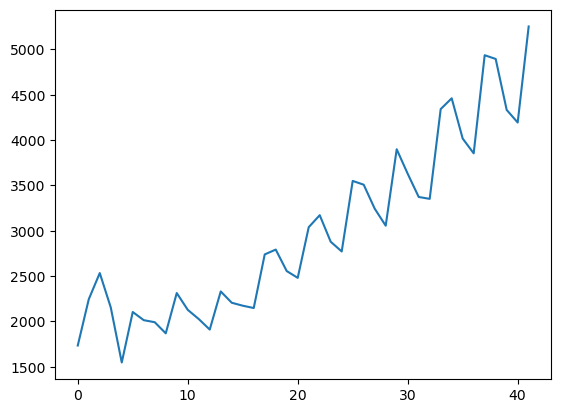

In [9]:
cocacola_data.Sales.plot()

In [11]:
len(cocacola_data)

42

### Splitting train and test data:

In [12]:
train=cocacola_data.head(30)
test=cocacola_data.tail(12)

### Plotting moving averages:

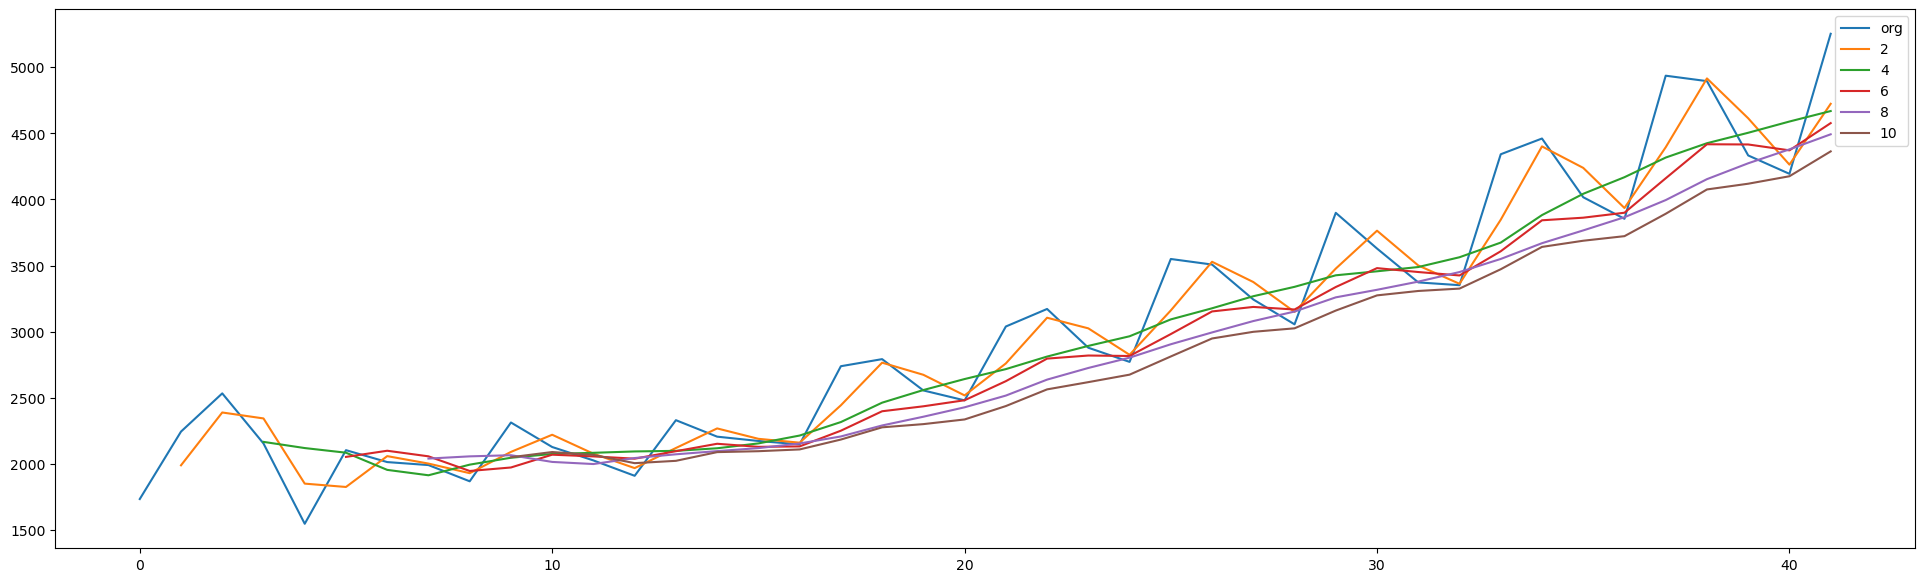

In [14]:
a=range(2,12,2)
plt.figure(figsize=(24,7))
cocacola_data.Sales.plot(label="org")
for i in a:
    cocacola_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Plotting moving averages:

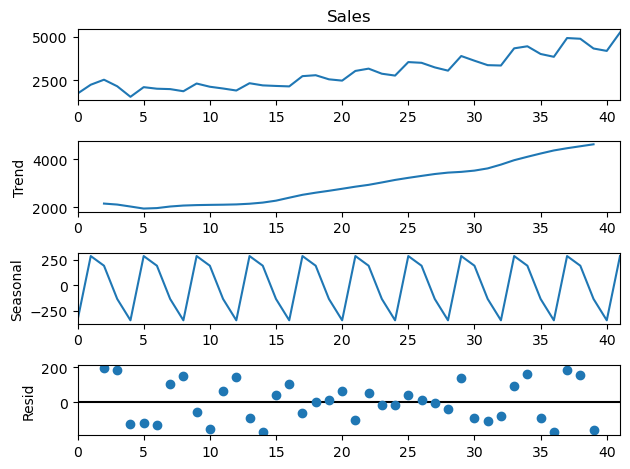

In [16]:
decompose_ts_add = seasonal_decompose(cocacola_data.Sales,period=4)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plots:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


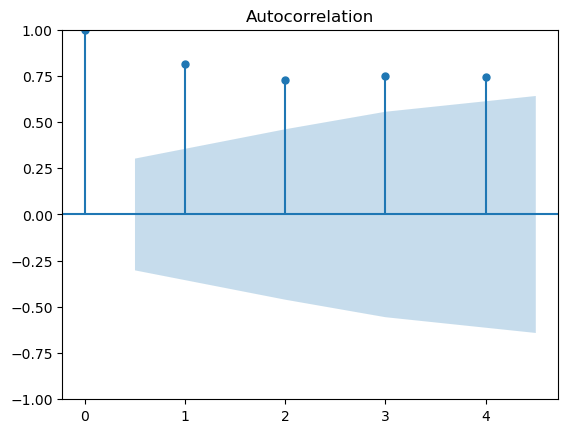

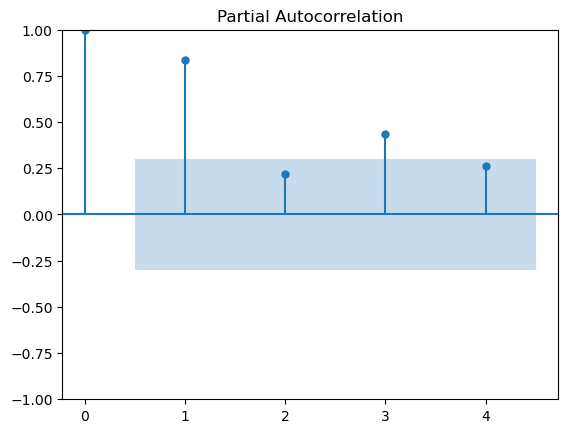

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola_data.Sales,lags=4)
tsa_plots.plot_pacf(cocacola_data.Sales,lags=4)
plt.show()

In [18]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Weighted moving average:

In [19]:
weights = np.array([0.1, 0.2, 0.3, 0.4])
df=pd.DataFrame()
df['Sales']=cocacola_data.Sales
df['WMA'] = df['Sales'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Sales,WMA
0,1734.827000,NaN
1,2244.960999,NaN
2,2533.804993,NaN
3,2154.962997,2244.601596
4,1547.818996,1996.873596
5,2104.411995,1990.483596
6,2014.362999,1962.128897
7,1991.746998,1976.671997
8,1869.049999,1958.457898
9,2313.631996,2085.953498


### Plotting weighted moving average:

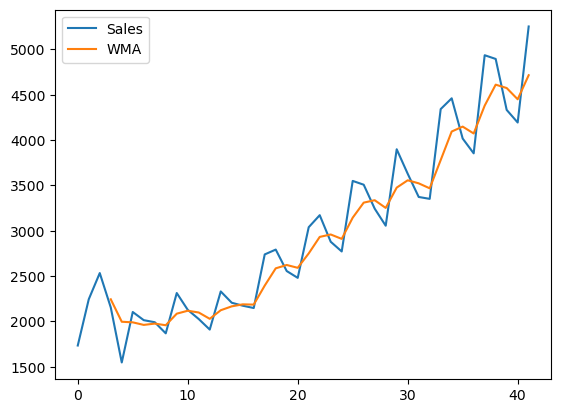

In [20]:
df.Sales.plot(kind='line')
df.WMA.plot(kind='line')
plt.legend()

### Simple exponential smoothing:

In [21]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

22.046763337847036

### Plotting for predictions for test data:

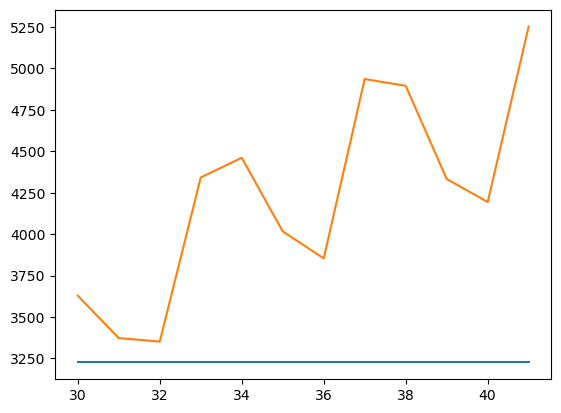

In [22]:
plt.plot(pred_ses)
plt.plot(test.Sales)

### Predictions for the whole data:

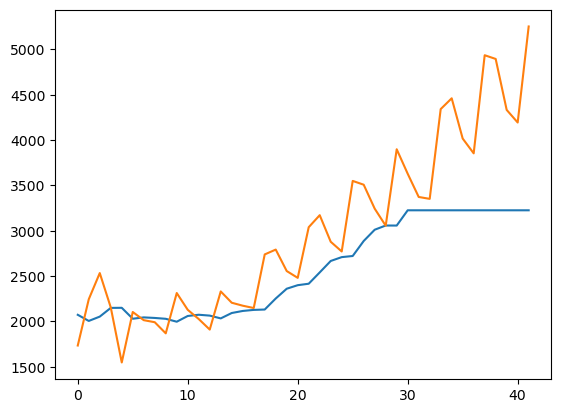

In [23]:
plt.plot(ses_model.predict(start=cocacola_data.index[0],end=cocacola_data.index[-1]))
plt.plot(cocacola_data.Sales)

### Running a for loop to find the best smoothing level value:

In [24]:
acc_ses={}
for i in range(101):
    ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=i/100)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    acc_ses[MAPE(pred_ses,test.Sales)]=i

print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))

100:12.53674608511905


### Building a model with 1 as smoothing level:

In [25]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=1)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales)

12.53674608511905

### Plotting for predictions for test data:

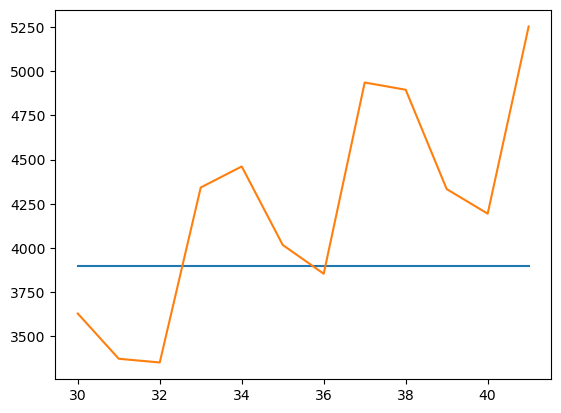

In [26]:
plt.plot(pred_ses)
plt.plot(test.Sales)

### Predictions for the whole data:

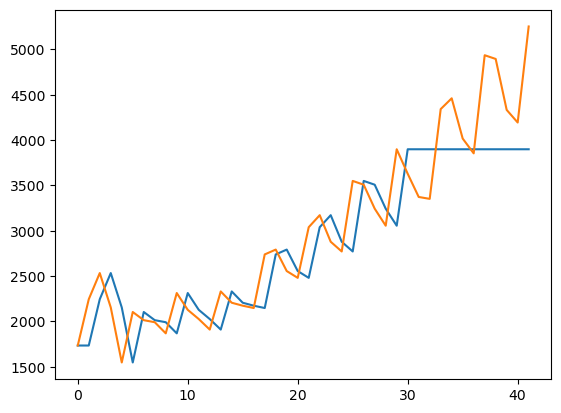

In [27]:
plt.plot(ses_model.predict(start=cocacola_data.index[0],end=cocacola_data.index[-1]))
plt.plot(cocacola_data.Sales)

### Building a model with holt method:

In [28]:
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Sales)

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\3588154429.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.3)


14.949345454699904

### Plots:

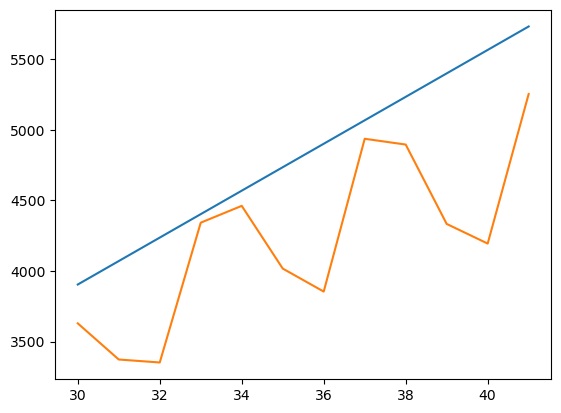

In [29]:
plt.plot(pred_holt)
plt.plot(test.Sales)

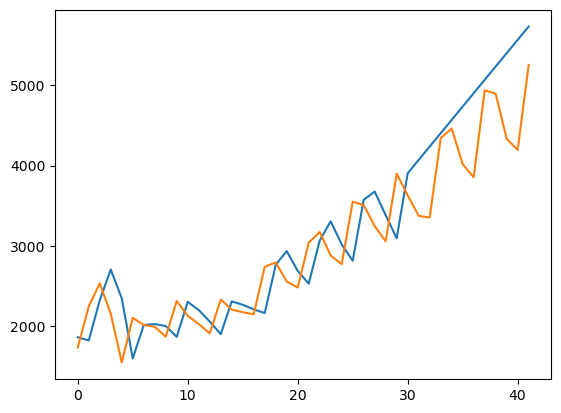

In [30]:
plt.plot(holt_model.predict(start=cocacola_data.index[0],end=cocacola_data.index[-1]))
plt.plot(cocacola_data.Sales)

### Running a loop to find the best hyper parameters:

In [31]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
        pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
        accuracy[MAPE(pred_holt,test.Sales)]=(i,j)

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\596088811.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
C:\Users\JOT

In [32]:
accuracy[min(accuracy.keys())]

(18, 77)

In [33]:
min(accuracy.keys())

8.341826396615945

### Building a model with smoothing level=0.18 and smoothing slope=0.77:

In [39]:
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.18, smoothing_slope=0.77)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Sales)

C:\Users\JOTHISH N\AppData\Local\Temp\ipykernel_9808\3678373503.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train["Sales"]).fit(smoothing_level=0.18, smoothing_slope=0.77)


8.341826396615945

### Plots:

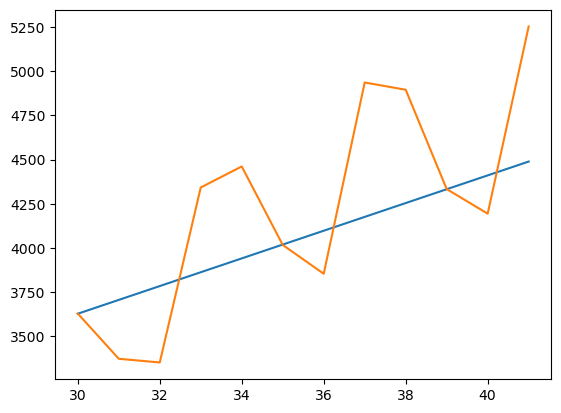

In [40]:
plt.plot(pred_holt)
plt.plot(test.Sales)

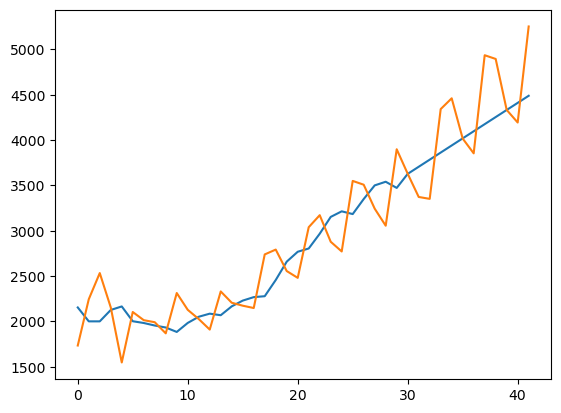

In [41]:
plt.plot(holt_model.predict(start=cocacola_data.index[0],end=cocacola_data.index[-1]))
plt.plot(cocacola_data.Sales)

### Building a model using holt winters method:

In [42]:
# From the moving averages plotted earlier,it can be seen that the best seasonal periods value is 4:

In [43]:
hw_add_add = ExponentialSmoothing(train["Sales"],seasonal='add', trend='add',seasonal_periods=4).fit()
pred_hw_add = hw_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw_add,test.Sales)

4.802181975028986

### Running a loop to find the best hyperparameters:

In [44]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw = ExponentialSmoothing(train["Sales"],seasonal=i, trend=j,seasonal_periods=4).fit()
        pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
        acc_hw[MAPE(pred_hw,test.Sales)]=(i,j)
    

In [45]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [46]:
min(acc_hw.keys())

2.7515035879327336

### Building a model with both seasonal and trend to be multiplicative:

In [47]:
hw = ExponentialSmoothing(train["Sales"],seasonal='mul', trend='mul',seasonal_periods=4).fit()
pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales)

2.7515035879327336

### Plotting:

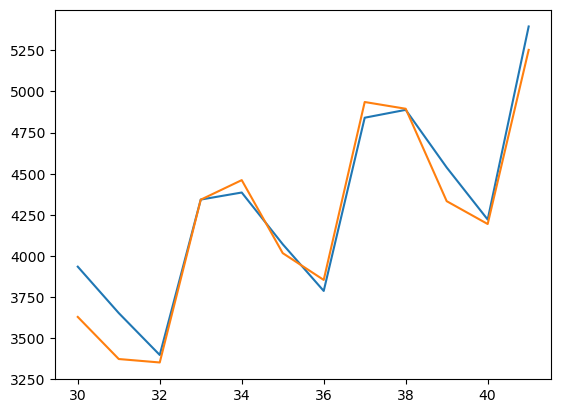

In [48]:
plt.plot(pred_hw)
plt.plot(test.Sales)

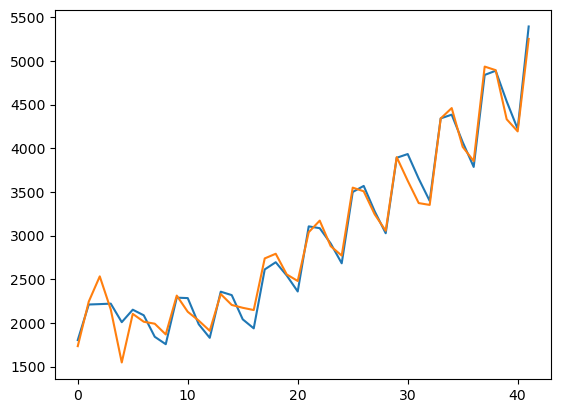

In [49]:
plt.plot(hw.predict(start=cocacola_data.index[0],end=cocacola_data.index[-1]))
plt.plot(cocacola_data.Sales)

# Conclusions:

#Simplle Exponential smoothing:

Best smoothing level value was found to be 1. Model built with this value has an rms error value of 12.53.

#Holt's model:

Best smoothing level value was found to be 0.18 and smoothing_slope value to be 0.77. Model built with these parameters have an rms error value of 8.34

#Holt-Winters method:

Putting both seasonal and trend to be multiplicative gives best results. The model built with these parameters give an rms error of 2.75

#So Holt winters model is taken as the final model:

In [50]:
model_final=hw